In [3]:
# Execute if necessary
# %%capture
!pip install numpy seaborn matplotlib pandas openml imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 9.7 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.13.1-py3-none-any.whl size=142798 sha256=93094874cbaaac7476498dd92bb83ab24f16d85fcf9ba982a65e728a2e01d88b
  Stored in directory: /root/.cache/pip/wheels/45/9a/36/e6701b6204a871ced537238ce7b5b2924a7408604bd301ad34
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=302cb559775345d5f3f2ccb8306fc0c974493c1f11cfda14e140625fa74a409f
  Stored in directory: /root/.cache/pip/wheels/08/82/8b/5c514221984e88c059b94e36a71d4722e590acaae04deab22e
Successfully built openml liac-arff


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# from imblearn.under_sampling import RandomUnderSampler

# Práctica 4: Overfitting

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado se llama LDPA y puede leer su descripción en la siguiente liga

https://www.openml.org/d/1483

In [5]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(1483, download_data=False)

# Obtiene el nombre de la columna a predecir
target = dataset_info.default_target_attribute

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    categorical_mask, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

categorical_mask = np.array(categorical_mask)
columns = np.array(columns)

In [6]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")
print(f"Las características categóricas son {str(columns[categorical_mask])}")
print(f"Las características numéricas son {str(columns[~categorical_mask])}")

La columna a predecir se llama 'Class'
Todas las características son ['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7']
Las características categóricas son ['V1' 'V2']
Las características numéricas son ['V3' 'V4' 'V5' 'V6' 'V7']


In [7]:
# Impresión de las características
features

,V1,V2,V3,V4,V5,V6,V7
0,1,1,105794.0,105777.0,148933.0,108479.0,109365.0
1,1,4,105795.0,105778.0,155325.0,96952.0,161363.0
2,1,3,105796.0,105779.0,156652.0,101610.0,148870.0
3,1,1,105797.0,105780.0,149736.0,107135.0,102479.0
4,1,2,105798.0,105781.0,155978.0,125455.0,106203.0
...,...,...,...,...,...,...,...
164855,5,2,43687.0,43679.0,106611.0,123166.0,12432.0
164856,5,1,43688.0,43680.0,120821.0,119848.0,87463.0
164857,5,4,43689.0,43681.0,104999.0,110823.0,161536.0
164858,5,2,43690.0,43682.0,102191.0,112520.0,10811.0


In [8]:
outputs

0         3
1         3
2         3
3         3
4         3
         ..
164855    3
164856    3
164857    3
164858    3
164859    3
Name: Class, Length: 164860, dtype: category
Categories (11, object): ['1' < '2' < '3' < '4' ... '8' < '9' < '10' < '11']

A continuación se realiza la partición de __train__ y __test__. __No debe utilizar la partición de test por ningún motivo__.

In [9]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    features, 
    outputs, 
    test_size=0.5, 
    random_state=11
)

## Asignación 1 &#x1F921;

Utilizando las técnicas vistas en clase, realicé su mejor esfuerzo para obtener el mejor modelo lineal posible utilizando __únicamente el conjunto de entrenamiento__ (X_train y y_train). Puede utilizar bibliotecas, pero únicamente las técnicas vistas en clase y debe ir generando métricas o visualizaciones que respalden su toma de decisiones. Debe tener e imprimir una estimación de $E_{out}$ utilizando su conjunto de entrenamiento. La métrica utilizada será la entropía cruzada.

- **V1** = {A, B, C, D, E} = 5 people
- **V2** = {ANKLE_LEFT, ANKLE_RIGHT, CHEST, BELT}
- **V3** = timestamp (Numeric) all unique
- **V4** = date FORMAT (Date)
- **V5** = x coordinate of the tag (Numeric)
- **V6** = y coordinate of the tag (Numeric)
- **V7** = z coordinate of the tag (Numeric)
- **output** = activity = {'walking', 'falling', 'lying down', 'lying', 'sitting down', 'sitting', 'standing up from lying', 'on all fours', 'sitting on the ground', 'standing up from sitting', 'standing up from sitting on the ground'} (Nominal)

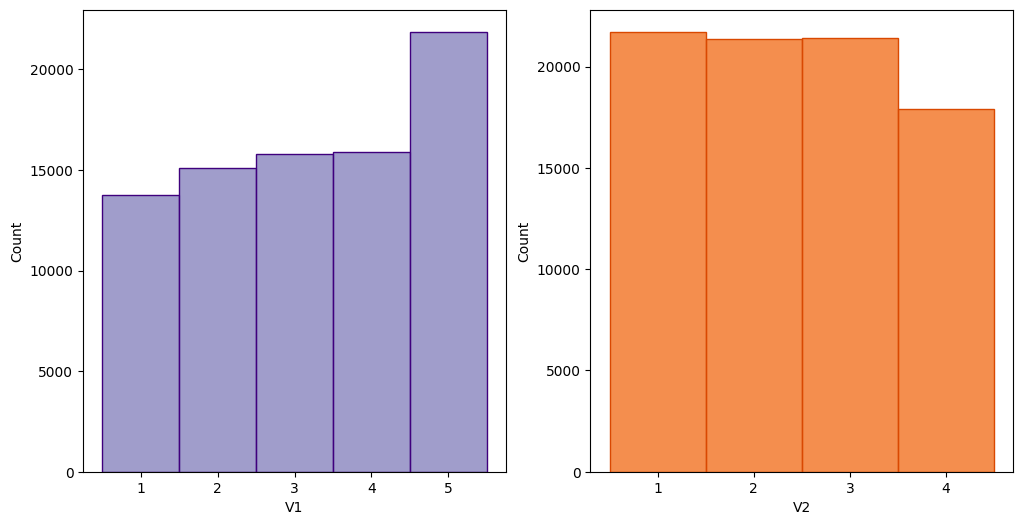

In [21]:
#Distribucion de las variables categoricas
columns = ["V1", "V2"]
colors = ["#807dba", "#f16913"]
edgecolors = ["#3f007d","#d94801"]
fig, axs = plt.subplots(ncols=2, nrows= 1, figsize=(12, 6))

for i, col in enumerate(columns):
    sns.histplot(data = X_train, x = col, ax = axs[i], color=colors[i], edgecolor=edgecolors[i])

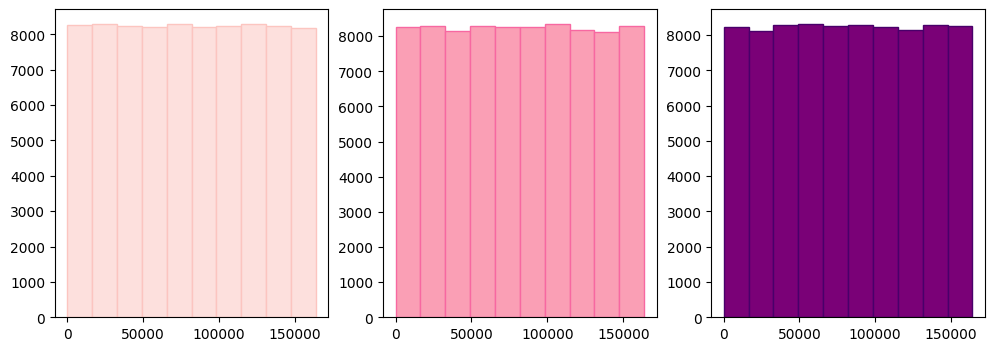

In [23]:
#Distribucion de los datos numericos
columns = ["V5", "V6", "V7"]
colors = ["#fde0dd", "#fa9fb5", "#7a0177"]
edgecolors = ["#fcc5c0","#f768a1", "#49006a"]
fig, axs = plt.subplots(ncols=3, nrows= 1, figsize=(12, 4))

for i, col in enumerate(columns):
    axs[i].hist(x = X_train[col].values, color=colors[i], edgecolor=edgecolors[i])

<Axes: xlabel='Class', ylabel='Count'>

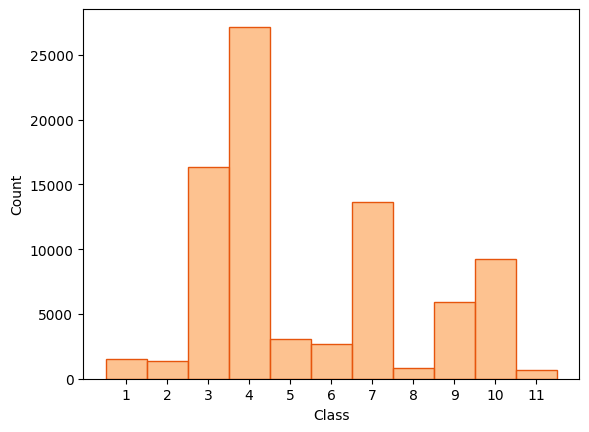

In [17]:
# Distribución del target
sns.histplot(x = y_train, color="#fdae6b",edgecolor="#e6550d")

*Al existir un desbalance en el corpus es probable que el modelo tenga una baja precision o tienda a predecir la clase con mayor cantidad de registros, para balancear los corpus se ocupan tecnicas de oversampling y under sampling, en este caso se podria usar undersampling eliminando registros de la característica con mayor frecuencia.*

In [ ]:
# Se explica más a detalle al final

# undersample = RandomUnderSampler(sampling_strategy={"3": 8000, "4": 14000, "7": 6500, "10":4000})
# undersample = RandomUnderSampler(sampling_strategy='majority')
# X_train, y_train = undersample.fit_resample(X_train, y_train)

Ya que las características están V5, V6 y V7 son coordenadas del sensor, podríamos ver cómo se comportan estos datos graficándolos tridimensionalmente.

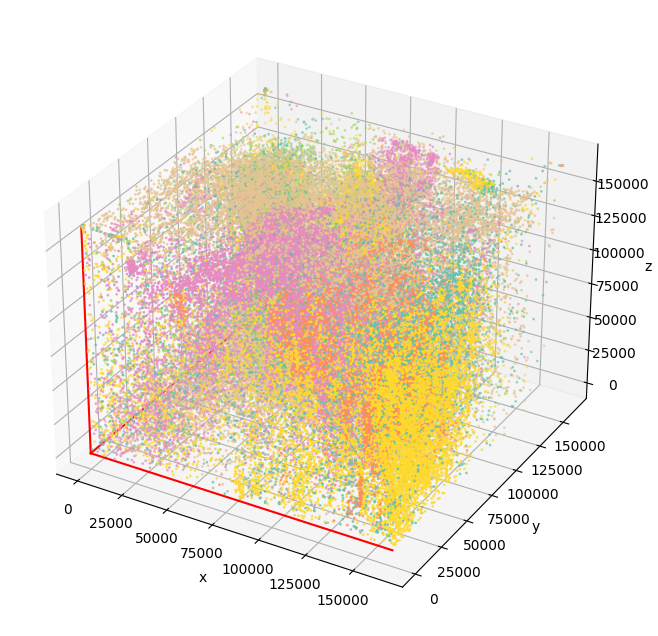

In [24]:
fig = plt.figure(figsize=(8,8))

# Clasificamos los colores dependiendo de la acividad realizada
color=y_train.cat.codes
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['V5'], X_train['V6'], X_train['V7'], c=color, cmap="Set2_r", s=1)
 
xAxisLine = ((min(X_train['V5']), max(X_train['V5'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(X_train['V6']), max(X_train['V6'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(X_train['V7']), max(X_train['V7'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

Observamos que no existe una separación o patrón visible entre las coordenadas (V5, V6, V7) y la actividad a predecir (y_train). 

In [ ]:
# Correlación entre las características del X_train
corr_x = X_train.corr()
# Imprimimos las características que poseen mayor correlación
print(corr_x.abs().unstack().drop_duplicates().sort_values(ascending=False))

V3  V3    1.000000
    V4    1.000000
V5  V6    0.366917
V3  V5    0.090484
V4  V5    0.090482
    V7    0.026448
V3  V7    0.026448
V5  V7    0.026174
V4  V6    0.022802
V3  V6    0.022801
V6  V7    0.013580
dtype: float64


C:\Users\Iván\AppData\Local\Temp\ipykernel_27224\3726137724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_x = X_train.corr()


Del analisis de correlacion podemos observar que las variables v3 y v4 estan altamente correlacionadas lo que podria acarrear problemas de multicolinealidad mas aun al algoritmo lineal que aplicaremos, es por ello que estas se eliminaran.

In [25]:
X_train = X_train.drop(columns=['V3', 'V4'])
X_test = X_test.drop(columns=['V3', 'V4'])
X_train

,V1,V2,V5,V6,V7
82677,3,3,72476.0,106489.0,146328.0
2843,1,1,135179.0,75851.0,79479.0
50670,2,2,76316.0,137080.0,101775.0
128441,5,4,97161.0,128160.0,137973.0
10592,1,2,70382.0,140689.0,119402.0
...,...,...,...,...,...
102327,4,2,146134.0,114564.0,47575.0
97617,4,2,54989.0,81198.0,26584.0
21584,1,1,44795.0,105412.0,49255.0
36543,2,2,59207.0,33106.0,114460.0


Ahora, buscaremos el mejor modelo lineal para entrenar los datos.

Para los datos numéricos se va a plicar el escalado de mínimos y máximos, y para las variables categóricas como la persona (V1) y el lugar del sensor en el cuerpo (V2), one hot encoder.

In [26]:
# Inicializamos el preprocesamiento general
preprocess_minmax = make_column_transformer(
    (MinMaxScaler(), ['V5', 'V6', 'V7']),
    (OneHotEncoder(), ['V1', 'V2'])
)

# El número de pliegues para crossvalidation
cv = KFold(n_splits = 16, shuffle = True)

In [27]:
# Inicializamos pipeline para una regresión logística
pipe_LR = Pipeline(steps=[
    ('preprocess', preprocess_minmax),
    ('model_LR', LogisticRegression(solver="sag", multi_class='multinomial', max_iter = 10000))
])

# Calculamos E_out
scores_LR = cross_val_score(pipe_LR, X_train, y_train, cv= cv)
print("%0.4f de error con una desviación de %0.4f" % (1 - scores_LR.mean(), scores_LR.std()))

0.6065 de error con una desviación de 0.0059


In [28]:
# Inicializamos pipeline para una gradiente estocástico con entropía cruzada
pipe_SGD = Pipeline(steps=[
    ('preprocess', preprocess_minmax),
    ('model_SGD', SGDClassifier(loss='log_loss', max_iter = 10000))
])

# Calculamos E_out
scores_SGD = cross_val_score(pipe_SGD, X_train, y_train, cv= cv)
print("%0.4f de error con una desviación de %0.4f" % (1 - scores_SGD.mean(), scores_SGD.std()))

0.6062 de error con una desviación de 0.0096


Podemos observar que de los dos modelos lineales la regresion logistica tuvo un mejor desempe;o

In [29]:
# Entrenamos usando regresión logística
pipe_LR.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['V5', 'V6', 'V7']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['V1', 'V2'])])),
                ('model_LR',
                 LogisticRegression(max_iter=10000, multi_class='multinomial',
                                    solver='sag'))])

## Asignación 2 &#x1F921;

Evalue su modelo final en el conjunto de test (X_test y y_test). Su práctica será evaluada acorde a las técnicas aplicadas, la estimación de $E_{out}$, el valor de $E_{test}$, y contra las métricas obtenidas por sus compañeros.

[Text(0.5, 1.0, 'Prediccion')]

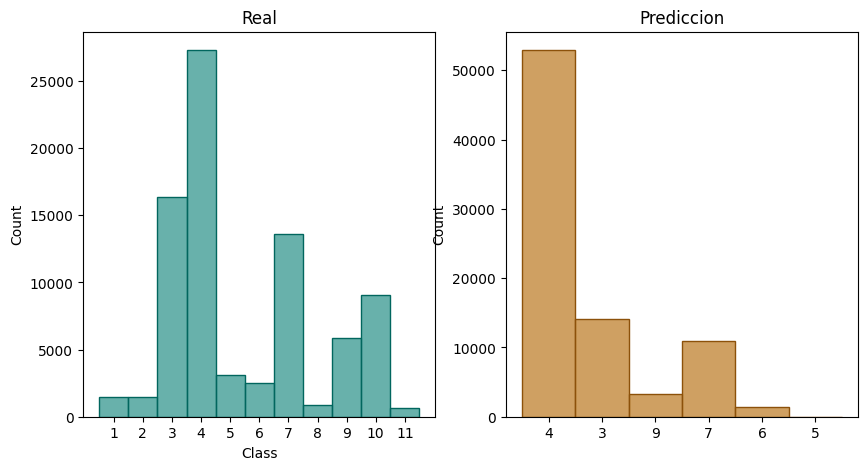

In [30]:
# Calculamos las predicciones a partir del conjunto de prueba
y_pred = pipe_LR.predict(X_test)

# Graficamos la distribución de cómo se debería de ver y cómo
# se observa el target de prueba y el target predicho
fig, axs = plt.subplots(ncols=2, nrows= 1, figsize=(10, 5))
sns.histplot(x = y_test, ax = axs[0], color="#35978f", edgecolors="#01665e").set(title="Real")
sns.histplot(x = y_pred, ax = axs[1], color="#bf812d", edgecolors="#8c510a").set(title='Prediccion')

Se ve que el gran problema del modelo, es que pierde por completo las clases 1, 2, 8, 10 y 11, a lo mejor si sólo se usaran menos clases se lograría mejorar el modelo lineal. El error de prueba está dado por:

In [ ]:
print("%0.4f de error en el conjunto predicho." % (1 - accuracy_score(y_test, y_pred)))

0.6055 de error en el conjunto predicho.


Finalmente, tenemos que $E_{out} = 0.6065$ y $E_{test} = 0.6055$, $E_{out} \approx  E_{test}$